In [ ]:
# GENERATE docs/chars.txt TABLE OF ORDINALS => SYMBOL MAPPINGS
from benchmark.util import UniUtil

lines = [""]
for i in range(32, 2**16):
    content = (UniUtil.chr(i).encode("utf-8").rjust(4) + " => " + str(i).ljust(7)).ljust(4+4+7)
    if len(lines[-1]) + len(content) <= 120:
        lines[-1] += content
    else:
        lines[-1] += "\n"
        lines.append(content)



file = open("docs/chars.txt", "w")
file.write(reduce(lambda p,c: p+c, lines, ""))
file.close()

In [1]:
# FAdo BACKTRACKING DEMO
from benchmark.convert import Converter
from timeit import timeit, time

evil = "(a + a)*"
re = Converter().math(evil)
startT = time.time()
i = 0

print "   iter        derivative  backtrack"
while startT + 60 > time.time():
    word = "a"*i + "b"
    print "'a'*{0:<2} + 'b'".format(i).ljust(10),
    print "{:10.4f}".format(timeit(stmt=lambda: re.evalWordP_PD(word), number=1)),
    print "{:10.4f}".format(timeit(stmt=lambda: re.evalWordP_Backtrack(word), number=1))
    i += 1

   iter        derivative  backtrack
'a'*0  + 'b'     0.0001     0.0000
'a'*1  + 'b'     0.0001     0.0000
'a'*2  + 'b'     0.0001     0.0000
'a'*3  + 'b'     0.0001     0.0000
'a'*4  + 'b'     0.0001     0.0001
'a'*5  + 'b'     0.0002     0.0001
'a'*6  + 'b'     0.0002     0.0002
'a'*7  + 'b'     0.0003     0.0006
'a'*8  + 'b'     0.0003     0.0019
'a'*9  + 'b'     0.0002     0.0030
'a'*10 + 'b'     0.0003     0.0068
'a'*11 + 'b'     0.0002     0.0114
'a'*12 + 'b'     0.0002     0.0258
'a'*13 + 'b'     0.0004     0.0388
'a'*14 + 'b'     0.0003     0.0597
'a'*15 + 'b'     0.0003     0.1187
'a'*16 + 'b'     0.0003     0.2495
'a'*17 + 'b'     0.0003     0.4883
'a'*18 + 'b'     0.0004     0.9556
'a'*19 + 'b'     0.0003     1.9467
'a'*20 + 'b'     0.0004     3.8564
'a'*21 + 'b'     0.0003     7.8410
'a'*22 + 'b'     0.0004    15.7955
'a'*23 + 'b'     0.0004    32.1275


In [3]:
from FAdo.reex import atom, concat

def f(n):
    if n == 0:
        return atom("a")
    return concat(arg1=f(n - 1), arg2=f(n - 1))

depth = 10
wordlen = 2**(depth + 1)
re = concat(arg1=f(depth), arg2=f(depth))

print "accepts only", wordlen, "a's"
print re.evalWordP("a"*wordlen)

accepts only 2048 a's
True


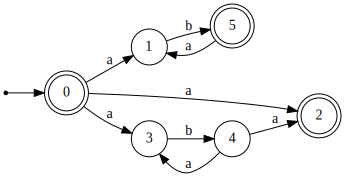

nfaPD: 1.81414198875


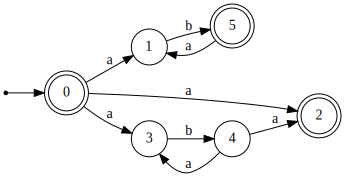

nfaPDO: 1.49107599258


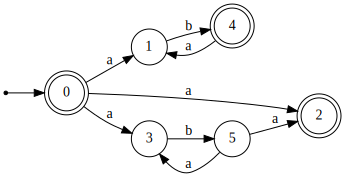

nfaPDK: 0.384010076523


In [1]:
import timeit
from benchmark.convert import Converter
c = Converter()

re = c.prog("((ab)*a)|(ab)*", partialMatch=False)
n = 2500
r = 3

results = dict()
order = [re.nfaPD, re.nfaPDO, re.nfaPDK] * r
for method in order:
    time = timeit.timeit(lambda: method(), number=n)
    results[method.__name__] = min(results.get(method.__name__, float("inf")), time)

re.nfaPD().display()
print "nfaPD:", results["nfaPD"]

re.nfaPDO().display()
print "nfaPDO:", results["nfaPDO"]

re.nfaPDK().display()
print "nfaPDK:", results["nfaPDK"]

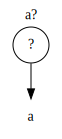

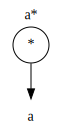

set([u'a', u'aa', u''])


In [4]:
from benchmark.convert import Converter
re = Converter().math("a?")
re.display()
re.compress().display()
words = re.pairGen()
print words